# ADVANCED CLASSIFICATION

In [54]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

dftrain=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm2_2223\\ravdess_features_dm2\\RavdessAudioOnlyFeatures_TRAIN.csv")
dftest=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm2_2223\\ravdess_features_dm2\\RavdessAudioOnlyFeatures_TEST.csv")

del dftrain["filename"]
del dftest["filename"]
del dftrain["modality"]
del dftest["modality"]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dftrain.iloc[:,7:]=pd.DataFrame(scaler.fit_transform(dftrain.iloc[:,7:]))
dftest.iloc[:,7:]=pd.DataFrame(scaler.fit_transform(dftest.iloc[:,7:]))
y_train=dftrain.iloc[:,0]
y_test=dftest.iloc[:,0]
X_train=dftrain.iloc[:,7:]
X_test=dftest.iloc[:,7:]

In [55]:
%%time
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sel = RFE(DecisionTreeClassifier(), n_features_to_select=9)
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)
selected_indices = sel.get_support(indices=True)
selected_feature_names = X_train.columns[selected_indices]
X_train = pd.DataFrame(X_train_sel, columns=selected_feature_names)
X_test = pd.DataFrame(X_test_sel, columns=selected_feature_names)

Wall time: 1min 18s


In [56]:
def replace_outlier(val, mean, std):
    if val > mean + 2.57*std:
        return mean 
    elif val < mean - 2.57*std:
        return mean
    return val

for col in X_train.iloc[:,0:len(X_train)]:
    mean = X_train[col].mean()
    std_dev = X_train[col].std(axis=0)
    X_train[col] = X_train[col].map(lambda x: replace_outlier(x, mean, std_dev))

y_train=pd.DataFrame(dftrain.iloc[:,0])
y_test=pd.DataFrame(dftest.iloc[:,0])

In [57]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
y_train_dummy = pd.DataFrame(label_encoder.fit_transform(y_train))
y_test_dummy = pd.DataFrame(label_encoder.fit_transform(y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#Solve the classification task defined in Module 1 (or define new ones) with the other classification methods analyzed 
#during the course: Logistic Regression, Support Vector Machines, Neural Networks, Ensemble Methods, Gradient Boosting Machines

In [9]:
X_train

,q25,kur,sc_q25,sc_q75_w2,sc_skew_w2,length_w4,lag1_skew_w4,mfcc_max_w4,mfcc_kur_w4
0,0.603864,0.553248,3.870318e-01,0.649332,-0.561696,-1.265421,-0.487272,-1.589479,-0.256236
1,0.603864,0.770118,3.982157e-01,0.689120,-0.926601,-1.209226,-0.514509,-1.345845,0.125946
2,0.622665,0.851346,-3.126531e-01,1.200776,-0.760880,-1.321756,-0.504177,-1.428765,-0.106623
3,0.603864,1.562804,2.068458e-01,1.544018,-0.950410,-1.490480,-0.496791,-1.166640,-0.407086
4,0.603864,0.286970,-4.646748e-02,0.553519,-0.372184,-0.871637,-0.495432,-0.764614,0.028587
...,...,...,...,...,...,...,...,...,...
1823,0.622665,-0.713004,1.211045e+00,1.837517,-1.150106,-0.927972,-0.469504,-0.485267,0.626044
1824,0.603864,-0.237333,-1.921633e-16,0.644416,-0.183011,-0.702913,-0.615193,-1.292189,1.031695
1825,0.622665,-0.806583,-1.921633e-16,0.778131,-0.283868,-0.871637,-0.483744,-1.020769,0.949815
1826,0.603864,-1.013416,1.858691e+00,1.933534,-0.991040,-0.309130,-0.186379,-0.076256,1.295573


# Logistic Regression

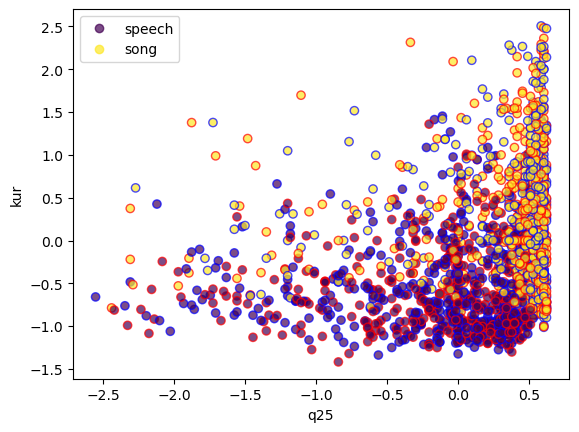

In [10]:
scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_dummy, edgecolor=("blue", "red"), alpha=0.7)
plt.xlabel('q25')
plt.ylabel('kur')
class_labels = ['speech', 'song']
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

plt.show()


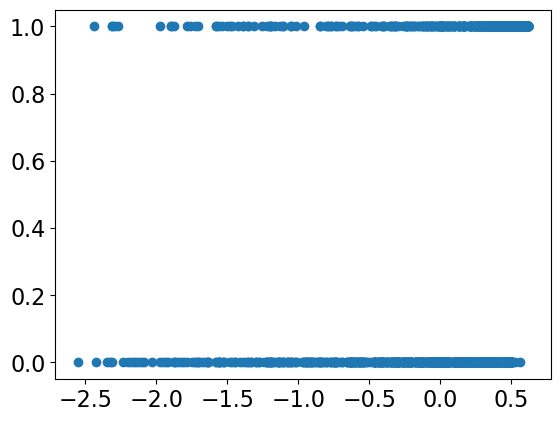

In [11]:
plt.scatter(np.array(X_train).T[0], y_train_dummy)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

clf = LogisticRegression(random_state=0)
clf.fit(np.array(X_train).T[0].reshape(-1,1), y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [13]:
np.array(X_test).T[0].shape

(624,)

In [14]:
y_pred = clf.predict(np.array(X_test).T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8381410256410257
F1-score [0.78372591 0.87067862]
              precision    recall  f1-score   support

        song       0.90      0.69      0.78       264
      speech       0.81      0.94      0.87       360

    accuracy                           0.84       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.85      0.84      0.83       624



In [15]:
clf.intercept_

array([-0.00795864])

In [16]:
clf.coef_

array([[2.24562959]])

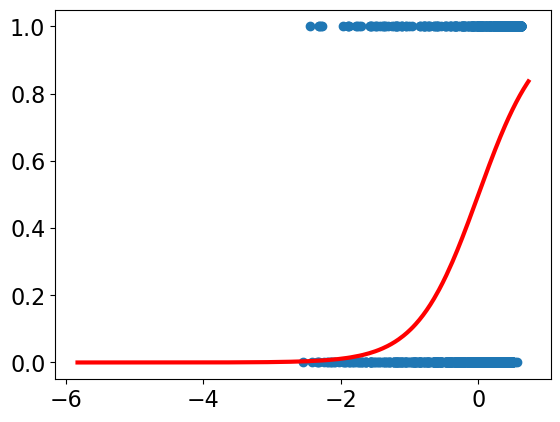

In [17]:
from scipy.special import expit

loss = expit(sorted(np.array(X_test).T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(np.array(X_test).T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(np.array(X_train).T[0].reshape(-1,1), y_train_dummy)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Support Vector Machines

LINEAR SUPPORT VECTOR CLASSIFIER

In [18]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, random_state=42)
#C is a Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
#C measure the importance of slack variable
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9230769230769231
F1-score [0.91111111 0.93220339]
              precision    recall  f1-score   support

        song       0.89      0.93      0.91       264
      speech       0.95      0.92      0.93       360

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9278846153846154
F1-score [0.91588785 0.9368864 ]
              precision    recall  f1-score   support

        song       0.90      0.93      0.92       264
      speech       0.95      0.93      0.94       360

    accuracy                           0.93       624
   macro avg       0.93      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * np.array(y_train_dummy) - 1) * decision_function <= 1)[0]
support_vectors = np.array(X_train)[support_vector_indices]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


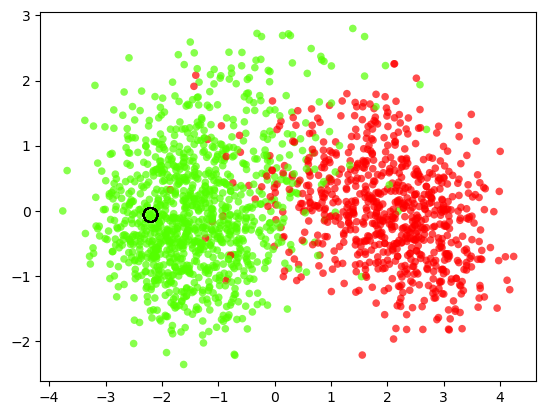

In [21]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
support_vectors_pca = pca.transform(support_vectors)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_dummy, cmap=plt.cm.prism, edgecolor="none", alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
plt.show()

EFFECT OF C

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterati

ValueError: num must be 1 <= num <= 1, not 2

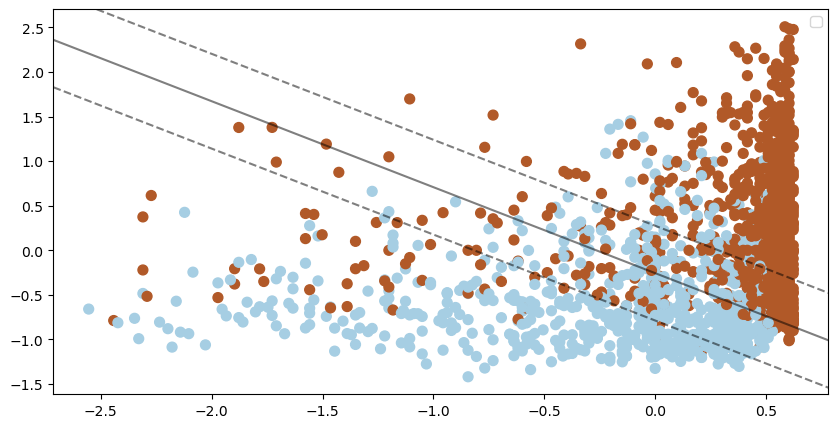

In [27]:
from sklearn.svm import LinearSVC
#C is a Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train.iloc[:,0:2], y_train_dummy)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train.iloc[:,0:2])
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * np.array(y_train_dummy) - 1) * decision_function <= 1)[0]
    support_vectors = np.array(X_train.iloc[:,0:2])[np.unique(support_vector_indices)]

    plt.subplot(1, 1, i + 1)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_dummy, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=("k"), levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors="none")
    plt.legend()
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted

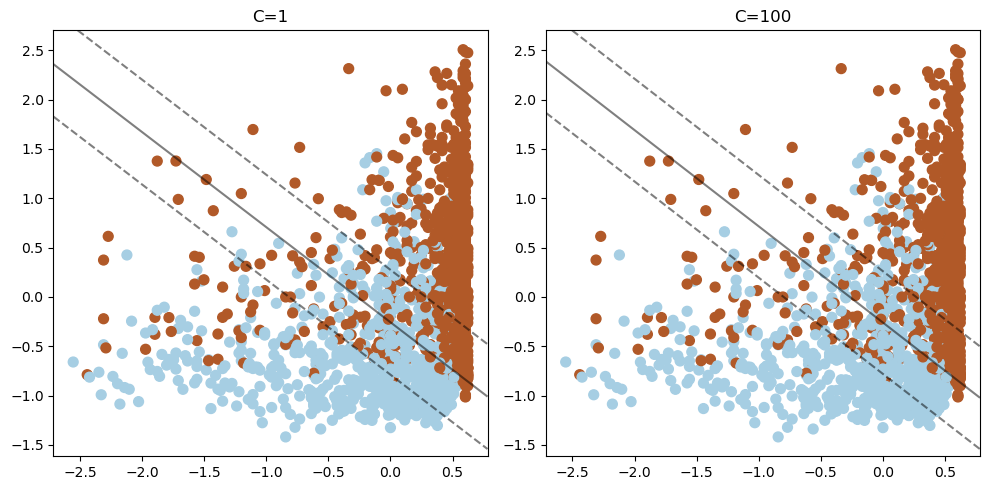

In [23]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

# C is a Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train.iloc[:, 0:2], y_train_dummy)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train.iloc[:, 0:2])
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * np.array(y_train_dummy) - 1) * decision_function <= 1)[0]
    support_vectors = np.array(X_train.iloc[:, 0:2])[np.unique(support_vector_indices)]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_dummy, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=("k"), levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors="none")
    plt.title("C=" + str(C))
    
plt.tight_layout()
plt.show()

FIT THE MODEL

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was

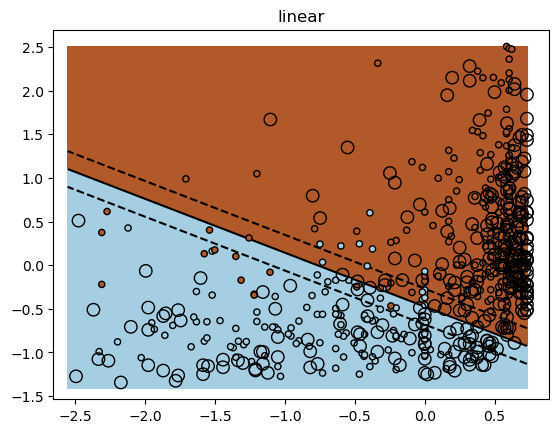

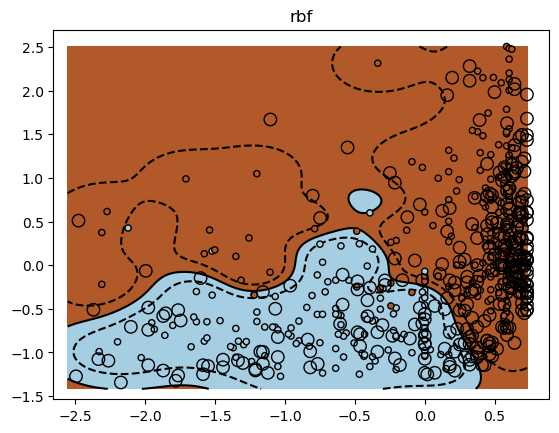

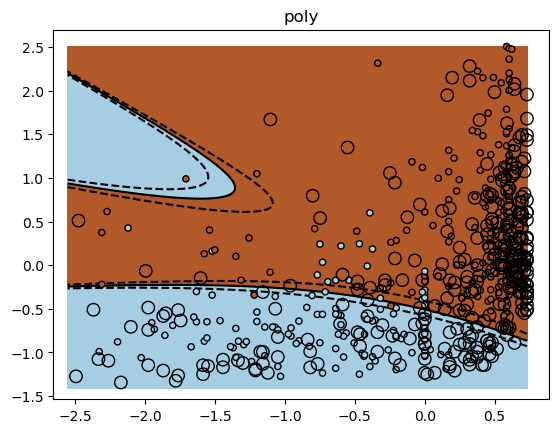

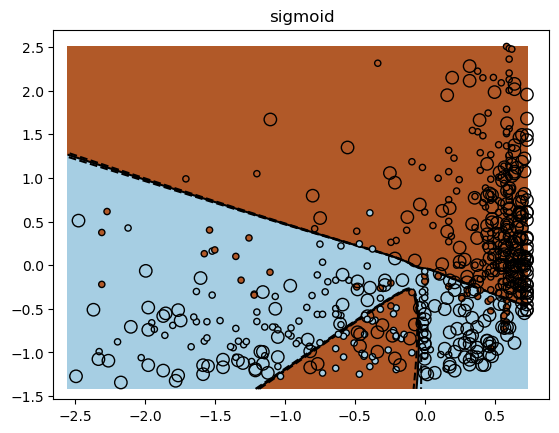

Wall time: 2.3 s


In [55]:
%%time
from sklearn.svm import SVC

for kernel in ('linear', 'rbf', 'poly', 'sigmoid'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train.iloc[0:300:,0:2], y_train_dummy.iloc[0:300,:])

    plt.figure()
    plt.clf()
    plt.scatter(X_train.iloc[0:300:, 0], X_train.iloc[0:300:, 1], c=y_train_dummy.iloc[0:300,:], zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test.iloc[0:300:, 0], X_test.iloc[0:300:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

# Neural Networks

In [56]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = (100, 200,)

In [65]:
labels = ["sgd constant lr", "sgd constant lr momentum", "sgd invscaling lr", "sgd invscaling lr momentum", 
          "sgd adaptive lr", "sgd adaptive lr momentum", "adam constant lr", "adam invscaling lr", "adam adaptive lr"]

sgd constant lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.974, 0.074709


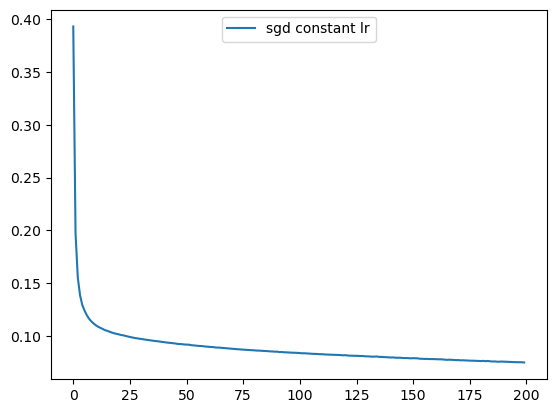

sgd constant lr momentum


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.998, 0.016957


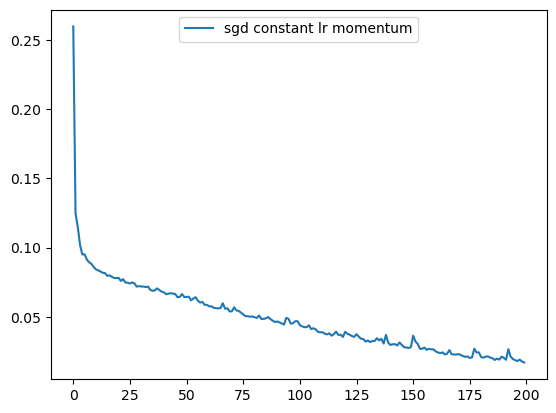

sgd invscaling lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.960, 0.184954


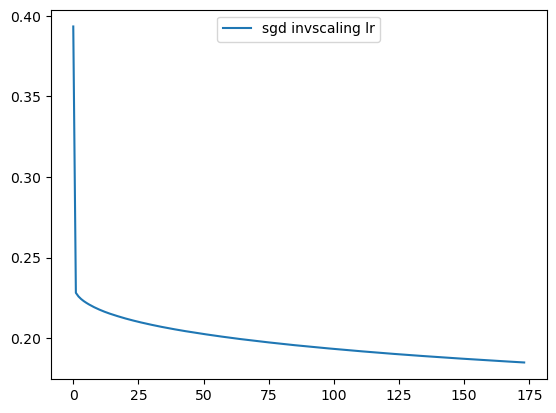

sgd invscaling lr momentum


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.963, 0.152443


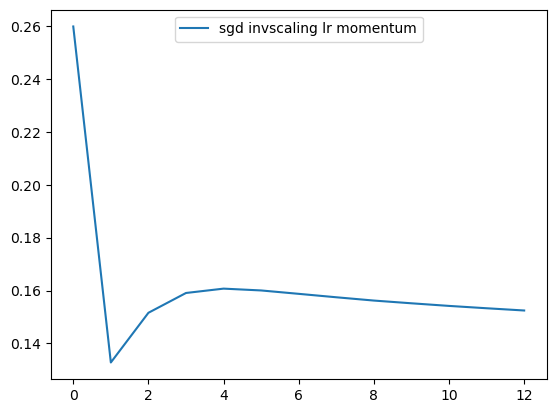

sgd adaptive lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.974, 0.074709


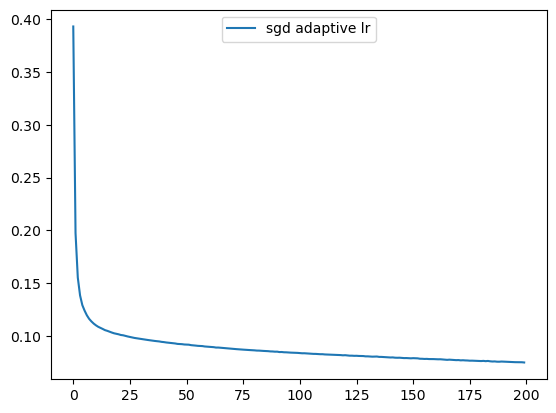

sgd adaptive lr momentum


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.998, 0.016957


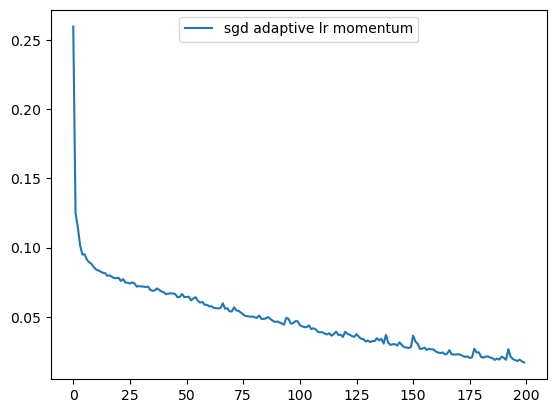

adam constant lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.995, 0.017777


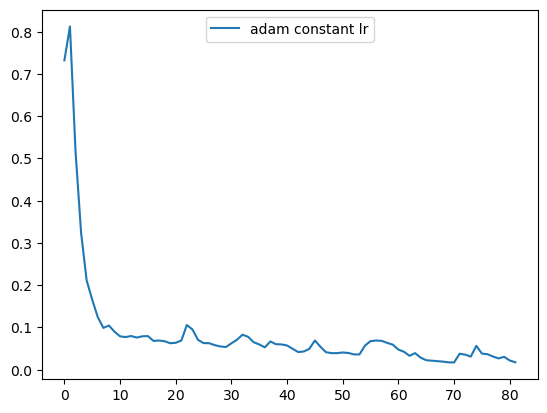

adam invscaling lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.995, 0.017777


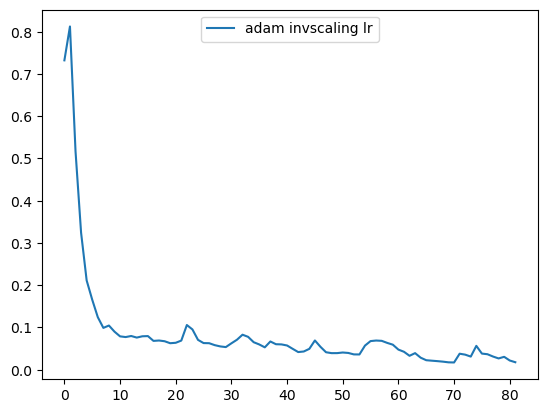

adam adaptive lr


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score and loss: 0.995, 0.017777


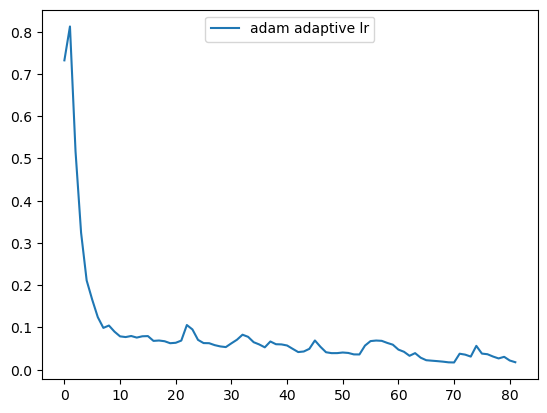

In [69]:
#different learning rate schedules and momentum parameters
#solver : {'lbfgs', 'sgd', 'adam'}
#  - 'lbfgs' is an optimizer in the family of quasi-Newton methods.
#     - 'sgd' refers to stochastic gradient descent.
#     - 'adam' refers to a stochastic gradient-based optimizer 
# learning_rate : {'constant', 'invscaling', 'adaptive'}
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
            'learning_rate_init': 0.2},
         
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
            'learning_rate_init': 0.2},
          
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
            'learning_rate_init': 0.2},
          
          {'solver': 'sgd', 'learning_rate': 'adaptive', 'momentum': 0,
            'learning_rate_init': 0.2},
          
          {'solver': 'sgd', 'learning_rate': 'adaptive', 'momentum': .9,
            'learning_rate_init': 0.2},
          
          {'solver': 'adam', 'learning_rate': 'constant', 'momentum': 0,
            'learning_rate_init': 0.2},
          
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': 0,
            'learning_rate_init': 0.2},
          
          {'solver': 'adam', 'learning_rate': 'adaptive', 'momentum': 0,
            'learning_rate_init': 0.2}]
          
  

 
labels = ["sgd constant lr", "sgd constant lr momentum", "sgd invscaling lr", "sgd invscaling lr momentum", 
          "sgd adaptive lr", "sgd adaptive lr momentum", "adam constant lr", "adam invscaling lr", "adam adaptive lr"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-.'}]


from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=200, **param)
    clf.fit(X_train, y_train_dummy)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train_dummy)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train_dummy), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

In [ ]:
#sgd constant lr momentum
#migliore modello solver=sgd learning rate=constant  con momento=0,9 perchè loss più bassa e training score più alto

In [58]:
from sklearn.metrics import (accuracy_score, f1_score, classification_report)

PERCEPTRON

In [71]:
#learning_rate='constant', momentum=0.9 sono già valori di default
clf = MLPClassifier(random_state=0, solver='sgd', learning_rate='constant', momentum=0.9)

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9439102564102564
F1-score [0.93482309 0.95077356]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       264
           1       0.96      0.94      0.95       360

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624



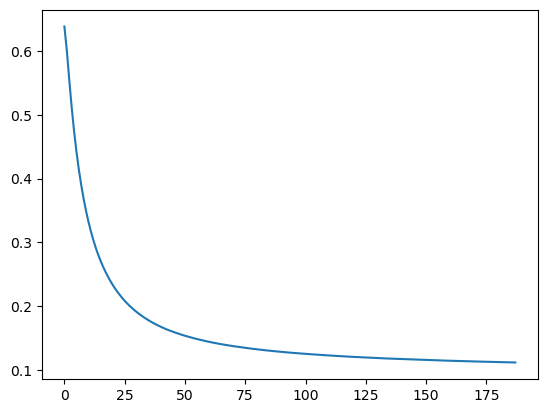

In [72]:
plt.plot(clf.loss_curve_)
plt.show()

CON HIDDEN LAYER

In [ ]:
#The ith element represents the number of neurons in the ith hidden layer
#activation=activation function ("identity", "logistic", "tanh", "relu")
#alpha=L2 penalty(regularization term parameter)

In [73]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,  
                    activation='identity',random_state=0, max_iter=500,
                   learning_rate='constant', solver='sgd')

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9455128205128205
F1-score [0.93656716 0.95224719]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       264
           1       0.96      0.94      0.95       360

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.95      0.95       624



In [74]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, 
                    activation='logistic',random_state=0, max_iter=500,
                   learning_rate='constant', solver='sgd')

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.5769230769230769
F1-score [0.         0.73170732]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.58      1.00      0.73       360

    accuracy                           0.58       624
   macro avg       0.29      0.50      0.37       624
weighted avg       0.33      0.58      0.42       624



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,
                    activation='relu',random_state=0, max_iter=500,
                   learning_rate='constant', solver='sgd')

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9455128205128205
F1-score [0.93632959 0.95238095]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       264
           1       0.96      0.94      0.95       360

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.95      0.95       624



In [76]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,  
                    activation='tanh',random_state=0, max_iter=500,
                   learning_rate='constant', solver='sgd')

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9487179487179487
F1-score [0.94007491 0.95518207]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       264
           1       0.96      0.95      0.96       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



In [38]:
#provando come funzione di ativazione tanh, identify, logistic, relu la activation function che da un accuracy 
#piu alta è tanh, relu e identity. Logistic come activation function da un valore di accuracy basso


Training loss 0.13996557489085112


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation loss 0.13996557489085112


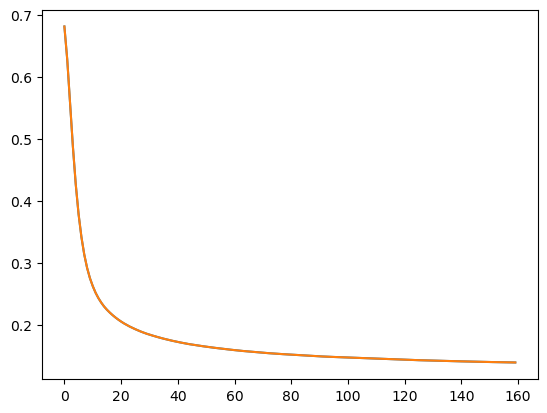

In [83]:
#loss curve senza early stopping
plt.plot(clf.loss_curve_)
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

In [84]:
#con early stopping
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,  
                    activation='tanh',random_state=0, max_iter=500,
                   learning_rate='constant', solver='sgd', early_stopping = True)

clf.fit(X_train, y_train_dummy)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\

Accuracy 0.9342948717948718
F1-score [0.92190476 0.94329184]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       264
           1       0.94      0.95      0.94       360

    accuracy                           0.93       624
   macro avg       0.93      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624



C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPCl

Training loss 0.189376422677444
Validation loss 0.22605368682899246


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\

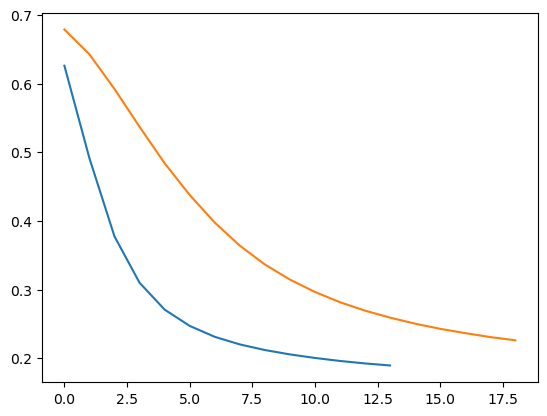

In [85]:
#loss curve con early stopping

plt.plot(clf.loss_curve_)
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

DEEP NEURAL NETWORKS CON KERAS

In [86]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [87]:
n_classes = 2
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="sgd", metrics=['accuracy'])
    return model

In [88]:
%%time
model1 = build_model()

history1 = model1.fit(X_train, y_train_dummy, validation_data=(X_test, y_test_dummy), epochs=50, batch_size=10).history

Epoch 1/50
183/183 [==============================] - 1s 3ms/step - loss: 0.1934 - accuracy: 0.9437 - val_loss: 0.1457 - val_accuracy: 0.9423
Epoch 2/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9623 - val_loss: 0.1350 - val_accuracy: 0.9439
Epoch 3/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9628 - val_loss: 0.1310 - val_accuracy: 0.9455
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9628 - val_loss: 0.1300 - val_accuracy: 0.9455
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9628 - val_loss: 0.1301 - val_accuracy: 0.9471
Epoch 6/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9623 - val_loss: 0.1316 - val_accuracy: 0.9455
Epoch 7/50
183/183 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9617 - val_loss: 0.1312 - val_accuracy: 0.9455
Epoch 

In [89]:
%%time
model2 = build_model()

history2 = model2.fit(X_train, y_train_dummy, validation_data=(X_test, y_test_dummy),epochs=50, batch_size=50).history

Epoch 1/50
37/37 [==============================] - 0s 5ms/step - loss: 0.3739 - accuracy: 0.8638 - val_loss: 0.2283 - val_accuracy: 0.9407
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9344 - val_loss: 0.1837 - val_accuracy: 0.9439
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9409 - val_loss: 0.1664 - val_accuracy: 0.9407
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9458 - val_loss: 0.1571 - val_accuracy: 0.9455
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9508 - val_loss: 0.1512 - val_accuracy: 0.9455
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9540 - val_loss: 0.1471 - val_accuracy: 0.9455
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9546 - val_loss: 0.1440 - val_accuracy: 0.9439
Epoch 8/50
37/37 [==

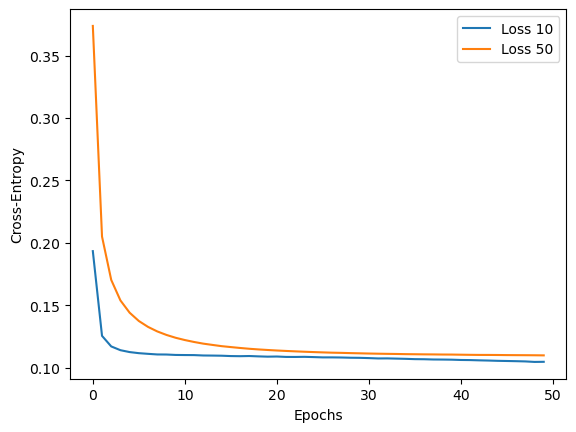

In [90]:
plt.plot(history1['loss'], label='Loss 10')
#loss con batch size=10
plt.plot(history2['loss'], label='Loss 50')
#loss con batch size=50
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()


In [91]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test_dummy)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test_dummy)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

20/20 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9455
Loss 0.132743, Accuracy 0.947115
Loss 0.133058, Accuracy 0.945513


In [92]:
model3 = build_model()

history3 = model3.fit(X_train, y_train_dummy, validation_data=(X_test, y_test_dummy), epochs=200, batch_size=10).history

Epoch 1/200
183/183 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.9333 - val_loss: 0.1511 - val_accuracy: 0.9423
Epoch 2/200
183/183 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9590 - val_loss: 0.1377 - val_accuracy: 0.9455
Epoch 3/200
183/183 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9623 - val_loss: 0.1317 - val_accuracy: 0.9487
Epoch 4/200
183/183 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9612 - val_loss: 0.1291 - val_accuracy: 0.9455
Epoch 5/200
183/183 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9612 - val_loss: 0.1294 - val_accuracy: 0.9471
Epoch 6/200
183/183 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9617 - val_loss: 0.1296 - val_accuracy: 0.9503
Epoch 7/200
183/183 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9612 - val_loss: 0.1319 - val_accuracy: 0.9455

In [93]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test_dummy)

20/20 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9487


In [94]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][49], history1['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][49], history1['val_accuracy'][49]))

Train: Loss 0.104662, Accuracy 0.964442
Val: Loss 0.132743, Accuracy 0.947115


In [95]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][49], history2['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][49], history2['val_accuracy'][49]))

Train: Loss 0.109819, Accuracy 0.962254
Val: Loss 0.133058, Accuracy 0.945513


In [96]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][99], history3['accuracy'][199]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][99], history3['val_accuracy'][199]))

Train: Loss 0.090967, Accuracy 0.975930
Val: Loss 0.135823, Accuracy 0.948718


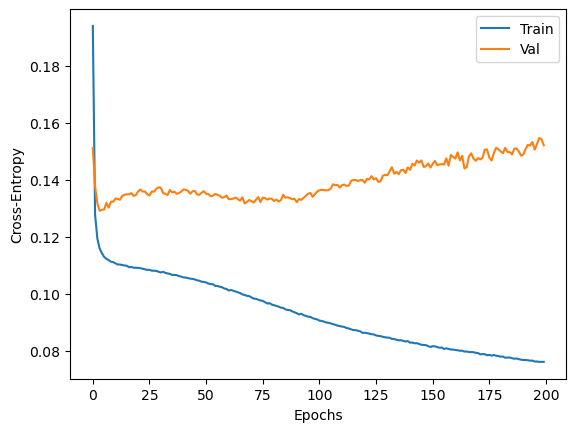

In [97]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()


EARLY STOPPING

In [98]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_dummy, test_size=0.2)

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9207 - val_loss: 0.1297 - val_accuracy: 0.9699
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9562 - val_loss: 0.1093 - val_accuracy: 0.9727
Epoch 3/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1242 - accuracy: 0.9590 - val_loss: 0.1036 - val_accuracy: 0.9699
Epoch 4/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9590 - val_loss: 0.1013 - val_accuracy: 0.9672
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9596 - val_loss: 0.0981 - val_accuracy: 0.9672
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9603 - val_loss: 0.0963 - val_accuracy: 0.9672
Epoch 7/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9583 - val_loss: 0.0940 - val_accuracy: 0.9672

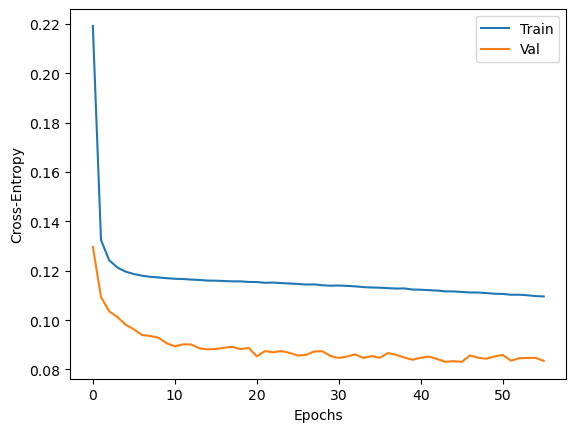

In [99]:
plt.plot(history4['loss'], label='Train')
plt.plot(history4['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()


In [100]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test_dummy)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

20/20 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.9455
Loss 0.132743, Accuracy 0.947115
Loss 0.133058, Accuracy 0.945513
Loss 0.152108, Accuracy 0.948718
Loss 0.128527, Accuracy 0.945513


L2 REGULARIZATION

In [101]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    model.add(Dense(7, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
147/147 [==============================] - 2s 4ms/step - loss: 0.8070 - accuracy: 0.5876 - val_loss: 0.7443 - val_accuracy: 0.6038
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7004 - val_loss: 0.5273 - val_accuracy: 0.9344
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.9425 - val_loss: 0.3460 - val_accuracy: 0.9645
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.9480 - val_loss: 0.2593 - val_accuracy: 0.9617
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9549 - val_loss: 0.2350 - val_accuracy: 0.9727
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9590 - val_loss: 0.2221 - val_accuracy: 0.9754
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9610 - val_loss: 0.2155 - val_accuracy: 0.9699

DROPOUT

In [102]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(7, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=100, batch_size=10, callbacks=[es,mc]).history

Epoch 1/100
147/147 [==============================] - 1s 4ms/step - loss: 0.6990 - accuracy: 0.5609 - val_loss: 0.6142 - val_accuracy: 0.7923
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.7804 - val_loss: 0.4900 - val_accuracy: 0.9071
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.8591 - val_loss: 0.4189 - val_accuracy: 0.9344
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8830 - val_loss: 0.3711 - val_accuracy: 0.9454
Epoch 5/100
147/147 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.9097 - val_loss: 0.3358 - val_accuracy: 0.9481
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.9118 - val_loss: 0.3088 - val_accuracy: 0.9617
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.9213 - val_loss: 0.2846 - val_accuracy: 0.9617

In [103]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test_dummy)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test_dummy)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test_dummy)

20/20 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9327


In [104]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.131200, Accuracy 0.945513
Loss 0.210195, Accuracy 0.947115
Loss 0.231065, Accuracy 0.932692


HYPERPARAMETER TUNING

In [105]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def build_model(n_layers=2, h_dim=5, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [106]:
n_layers = [1, 2, 3]
h_dim = [7, 15, 21]
activation = ['relu', 'tanh', 'logistic', 'identity']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [107]:
model = KerasRegressor(build_fn=build_model)
rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_18776\4224828219.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model)


16/16 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9507


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_18776\3946905239.py", line 10, in build_model
    model.add(Dense(h_dim, activation=activation, inpu

In [109]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))


Best: 0.261095 using {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 7, 'activation': 'relu'}
1.284494 (0.261923) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 15, 'activation': 'tanh'}
nan (nan) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 15, 'activation': 'logistic'}
3.315938 (4.127860) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 21, 'activation': 'relu'}
nan (nan) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 7, 'activation': 'logistic'}
0.261095 (0.045055) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 7, 'activation': 'relu'}


# ENSEMBLE METHODS

In [64]:
import json
json.dumps(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [31]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'song': {'precision': 0.9040590405904059,
  'recall': 0.928030303030303,
  'f1-score': 0.9158878504672897,
  'support': 264},
 'speech': {'precision': 0.9461756373937678,
  'recall': 0.9277777777777778,
  'f1-score': 0.9368863955119215,
  'support': 360},
 'accuracy': 0.9278846153846154,
 'macro avg': {'precision': 0.9251173389920868,
  'recall': 0.9279040404040404,
  'f1-score': 0.9263871229896057,
  'support': 624},
 'weighted avg': {'precision': 0.92835707720773,
  'recall': 0.9278846153846154,
  'f1-score': 0.9280023956853466,
  'support': 624}}

AttributeError: 'DataFrame' object has no attribute 'feature_names'

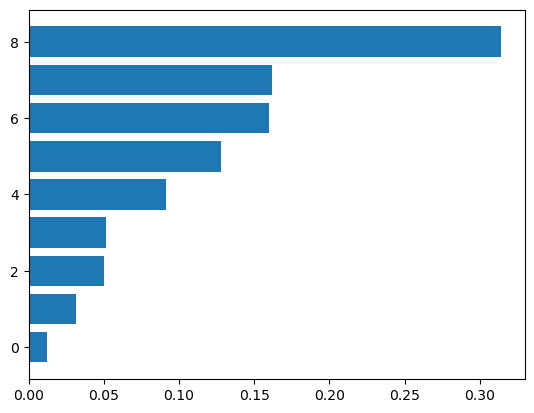

In [62]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(dftrain.feature_names[sorted_idx]))
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_35728\1465631013.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train_dummy)


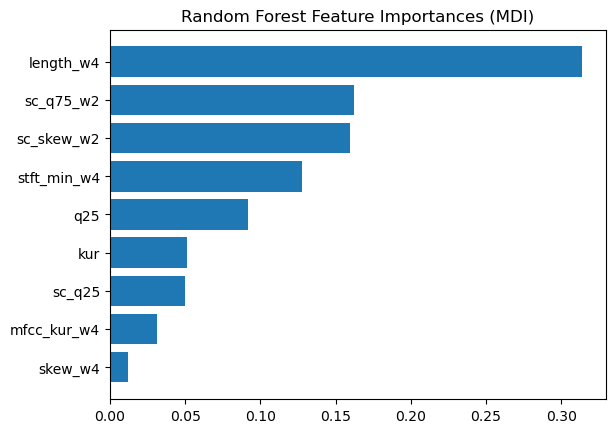

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Creazione e addestramento del modello Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train_dummy)

# Calcolo delle importanze delle caratteristiche
feature_importances = clf.feature_importances_

# Ordinamento degli indici delle caratteristiche
sorted_idx = feature_importances.argsort()[-nbr_features:]

# Creazione del grafico a barre delle importanze delle caratteristiche
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(X_train.columns[sorted_idx]))
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

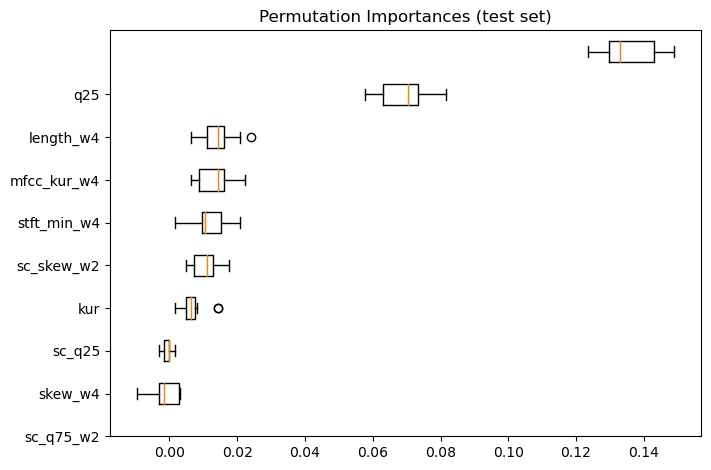

In [65]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test_dummy, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False)
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.yticks(y_ticks, np.array(X_train.columns[sorted_idx]))
plt.show()

In [127]:
from sklearn.tree import plot_tree
clf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=602690124)

C:\Users\HP\AppData\Local\Temp\ipykernel_18776\1462532606.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


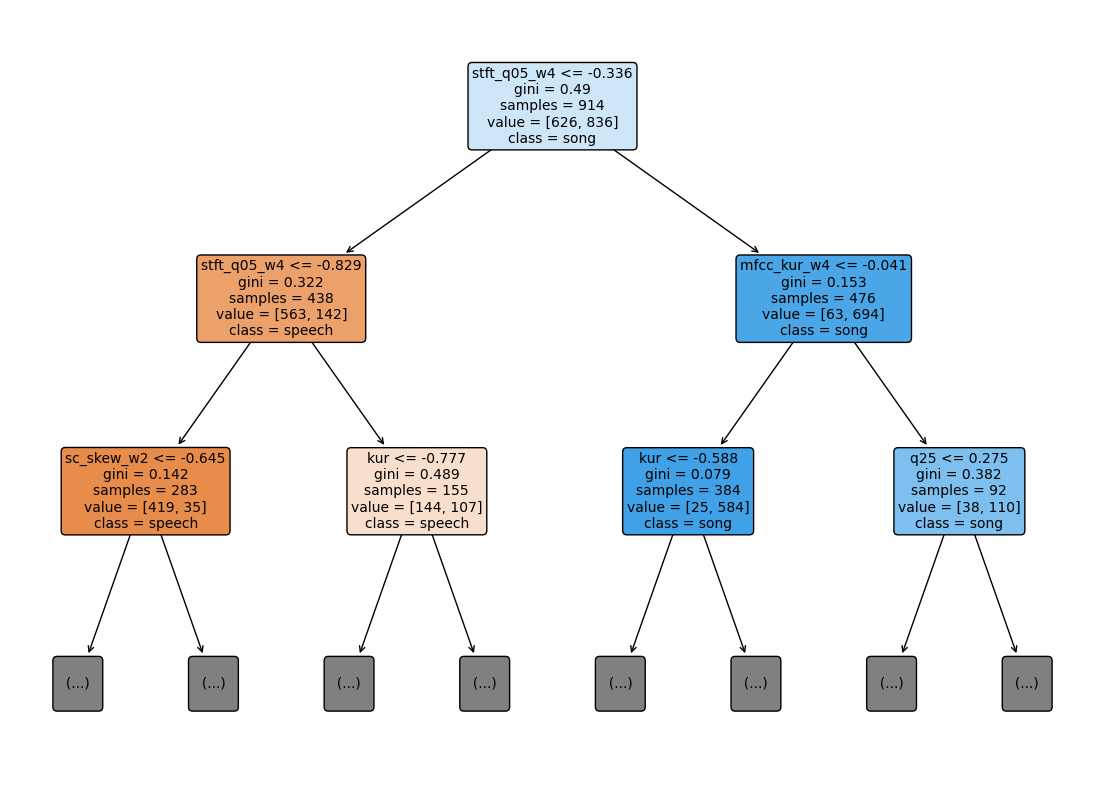

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Visualizzazione del primo albero decisionale
plt.figure(figsize=(14, 10))
plot_tree(clf.estimators_[0], class_names=["speech", "song"], feature_names=X_train.columns, filled=True,rounded=True,
          fontsize=10,
          max_depth=2)  
plt.show()

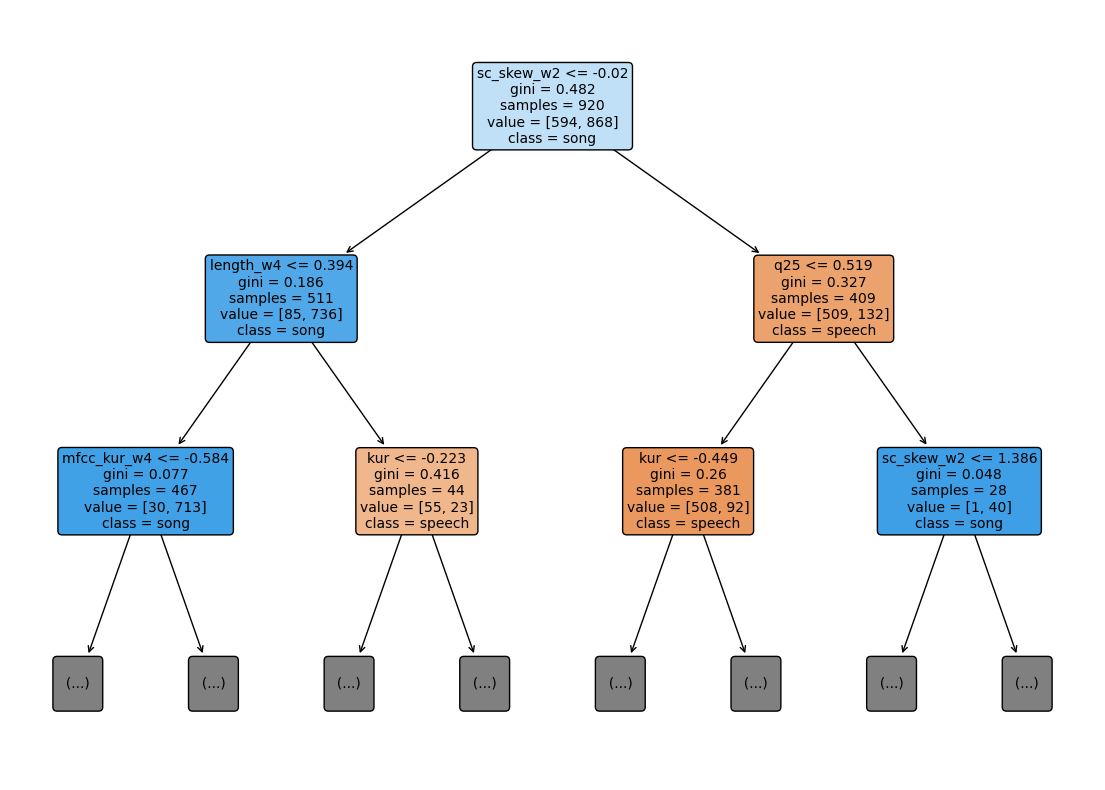

In [140]:
plt.figure(figsize=(14, 10))
plot_tree(clf.estimators_[1], class_names=["speech", "song"], feature_names=X_train.columns, filled=True,rounded=True,
          fontsize=10,
          max_depth=2)  
plt.show()

In [141]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\AppData\Local\Temp\ipykernel_18776\1127310597.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy 0.9567307692307693
F1-score [0.9489603  0.96244784]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       264
           1       0.96      0.96      0.96       360

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



In [142]:
#cross validation
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

Accuracy 0.968 +/- 0.010


TUNING THE HYPERPARAMETER

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [144]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

Accuracy 0.9583333333333334
F1-score [0.95131086 0.96358543]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       264
           1       0.97      0.96      0.96       360

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



In [145]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

Accuracy 0.9567307692307693
F1-score [0.94953271 0.96213184]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       264
           1       0.97      0.95      0.96       360

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



In [146]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 19}

BAGGING

In [147]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=None, n_estimators=100, 
                        random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9535256410256411
F1-score [0.94517958 0.9596662 ]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       264
           1       0.96      0.96      0.96       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



In [148]:
#Bagging con support vector classifier come stimatore base
clf = BaggingClassifier(base_estimator=SVC(C=1000), 
                        n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9358974358974359
F1-score [0.92592593 0.94350282]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       264
           1       0.96      0.93      0.94       360

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.93       624
weighted avg       0.94      0.94      0.94       624



In [149]:
##Bagging con random forest classifier come stimatore base
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9615384615384616
F1-score [0.95505618 0.96638655]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       264
           1       0.97      0.96      0.97       360

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



BOOSTING

In [150]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9583333333333334
F1-score [0.95149254 0.96348315]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       264
           1       0.97      0.95      0.96       360

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



In [151]:
#Adaboost con random forest classifier come stimatore base
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9663461538461539
F1-score [0.96045198 0.9707113 ]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       264
           1       0.97      0.97      0.97       360

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624



# GRADIENT BOOSTING

In [152]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9471153846153846
F1-score [0.93761815 0.95410292]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       264
           1       0.96      0.95      0.95       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



In [153]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9535256410256411
F1-score [0.94579439 0.95932679]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       264
           1       0.97      0.95      0.96       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



XGBOOST

In [91]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.2 MB/s eta 0:00:00


In [154]:
from xgboost import XGBClassifier

clf = XGBClassifier(objective='binary:logistic', 
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    reg_lambda = 1,
                    tree_method='exact', # 'approx'
                    use_label_encoder=False,
                    random_state=42
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

Accuracy 0.9519230769230769
F1-score [0.94382022 0.95798319]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       264
           1       0.97      0.95      0.96       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


LIGHTGBM

In [96]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 466.7 kB/s eta 0:00:00


In [157]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test_dummy, y_pred))
print('F1-score %s' % f1_score(y_test_dummy, y_pred, average=None))
print(classification_report(y_test_dummy, y_pred))

Accuracy 0.9519230769230769
F1-score [0.94402985 0.95786517]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       264
           1       0.97      0.95      0.96       360

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624



C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ADVANCED REGRESSION

GRADIENT BOOSTING REGRESSOR

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crea l'istanza del regressore di Gradient Boosting
regressor = GradientBoostingRegressor()

# Addestra il modello utilizzando i dati di addestramento
regressor.fit(X_train, y_train_dummy)

# Effettua le previsioni sui dati di test
y_pred = regressor.predict(X_test)

# Calcola l'errore quadratico medio (MSE) tra le previsioni e i valori di test
mse = mean_squared_error(y_test_dummy, y_pred)
print("Mean Squared Error:", mse)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.04476056737004941


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

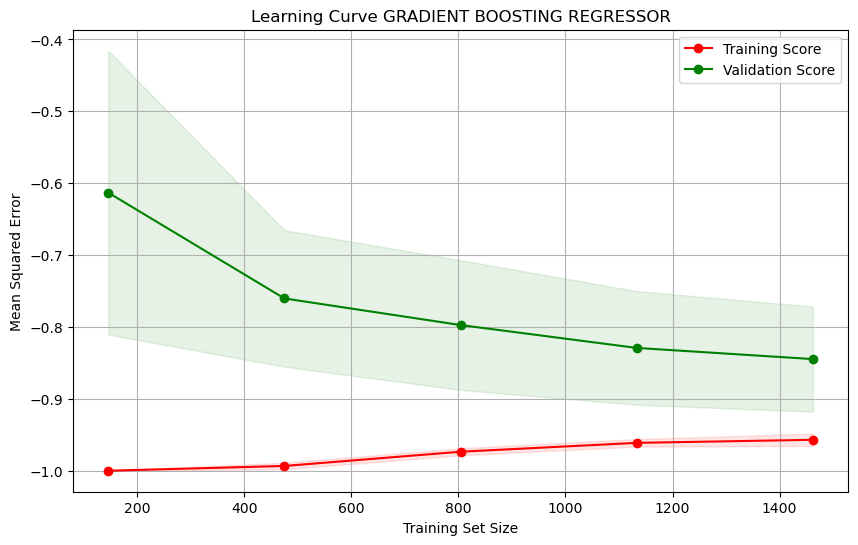

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

# Crea l'istanza del regressore di Gradient Boosting
regressor = GradientBoostingRegressor()

# Calcola la curva di apprendimento
train_sizes, train_scores, val_scores = learning_curve(regressor, X_train, y_train_dummy, cv=5, 
                                                      )

# Calcola la media e la deviazione standard degli score di addestramento e validazione
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotta la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve GRADIENT BOOSTING REGRESSOR')
plt.legend(loc='best')
plt.grid(True)
plt.show()


RANDOM FOREST REGRESSOR

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crea un'istanza del regressore di Random Forest
regressor = RandomForestRegressor(n_estimators=500, random_state=42)

# Addestra il modello utilizzando i dati di addestramento
regressor.fit(X_train, y_train_dummy)

# Effettua le previsioni sui dati di test
y_pred = regressor.predict(X_test)

# Calcola l'errore quadratico medio (MSE) tra le previsioni e i valori di test
mse = mean_squared_error(y_test_dummy, y_pred)
print("Mean Squared Error:", mse)

C:\Users\HP\AppData\Local\Temp\ipykernel_35728\2096544719.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train_dummy)


Mean Squared Error: 0.04122185256410257


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

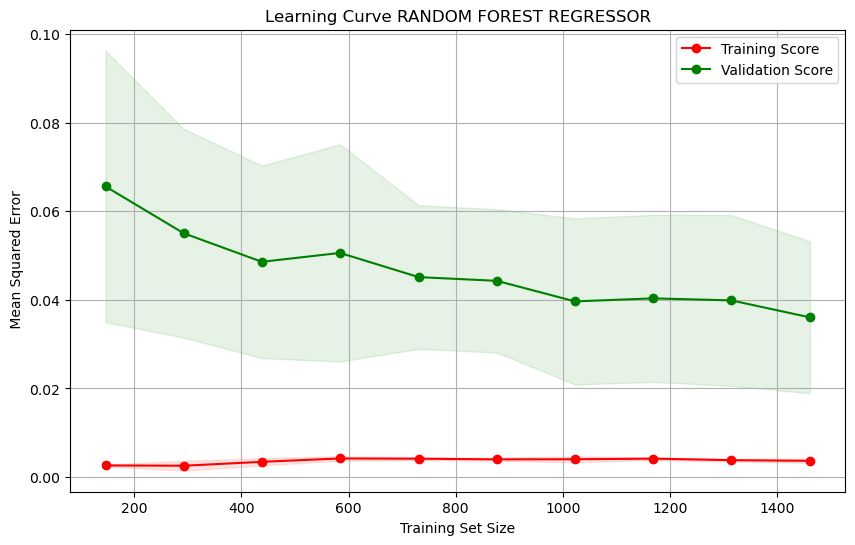

In [71]:
# Calcola la curva di apprendimento
train_sizes, train_scores, val_scores = learning_curve(regressor, X_train, y_train_dummy, cv=5, 
                                                      scoring='neg_mean_squared_error', 
                                                      train_sizes=np.linspace(0.1, 1.0, 10))

# Calcola la media e la deviazione standard degli score di addestramento e validazione
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotta la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel(' Mean Squared Error')
plt.title('Learning Curve RANDOM FOREST REGRESSOR')
plt.legend(loc='best')
plt.grid(True)
plt.show()